# ***PROJECT:- Flight Price EDA***✈️

#📘 **Dataset Overview**

This project focuses on analyzing flight price data to understand factors that influence airfare and overall flight trends. The dataset used in this notebook contains information such as airlines, source and destination cities, departure and arrival times, number of stops, flight duration, and ticket prices.
Each record in the dataset represents a unique flight instance.

## Typical Columns (as per Flight Price datasets):

 -Airline – Name of the airline operating the flight.

 -Date_of_Journey – Date when the journey takes place.

 -Source – City from where the flight departs.

 -Destination – City where the flight lands.

 -Dep_Time – Scheduled departure time.

 -Arrival_Time – Scheduled arrival time.

 -Duration – Total travel duration.

 -Total_Stops – Number of stops during the flight.

 -Additional_Info – Extra details about meals or in-flight services.

 -Price – The ticket price (target variable for prediction tasks).
 _______________________________________________________________________________

# 📊**Dataset Summary**

**-Total Records:** ~10,000 (approx., may vary depending on data cleaning).

**-Type of Variables:**

  * *Categorical:* Airline, Source, Destination, Total_Stops, Additional_Info

 * *Numerical:* Duration (converted to minutes), Price

 * *Temporal:* Date_of_Journey, Dep_Time, Arrival_Time

**-Data Range:** Covers multiple routes and airlines across India.

**-Missing Values:** Some columns like Route or Additional_Info may contain missing data.

**-Data Cleaning:** Involves date formatting, duration conversion, handling missing values, and encoding categorical features.
________________________________________________________________________________

# 📈**Key Insights (Expected Findings)**

**1-) Price Variation:**
Prices increase with the number of stops — non-stop flights are the most expensive.

**2-) Airline Effect:**
Premium airlines like Jet Airways and Air India tend to have higher fares compared to low-cost carriers.

**3-) Source & Destination Trends:**
Routes like Delhi → Cochin and Delhi → Bangalore have the highest flight frequency.

**4-) Time Impact:**
Flights departing in the early morning or late night tend to have lower prices compared to peak hours.

**5-) Duration vs Price:**
Longer flight durations generally correlate with higher prices.
________________________________________________________________________________

# 📦**Possible Use Cases:**

**1-) Price Prediction Model:**
Build a regression model to predict flight ticket prices based on flight features.

**2-) Customer Insights:**
Identify budget-friendly airlines and time slots for travelers.

**3-) Airline Optimization:**
Airlines can analyze demand and pricing patterns for better route management.

**4-) Market Analysis:**
Travel agencies can use it to recommend optimal booking times or destinations.

**5-) Visualization Dashboard:**
Create dashboards to monitor flight trends by airline, route, or season.


________________________________________________________________________________
""

In [2]:
!git clone 'https://github.com/HarshvardhanSingh-13/Datasets'

fatal: destination path 'Datasets' already exists and is not an empty directory.


In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_excel('/content/Datasets/Flight Prices/flight_price.xlsx')

In [5]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:

# KPI's

# 1) Average Ticket Price by Airline
# 2) Average Ticket Price by Route (Source → Destination)
# 3) Average Price by Number of Stops
# 4) Flight Volume by Airline
# 5) Flight Volume by Source Airport
# 6) Monthly Price Trend
# 7) Average Departure Hour by Airline
# 8) Average Duration Per Airline


## 1) Overall data analysis

# 1.1) Importing the necessary Libraries

In [7]:
import pandas as pd
import numpy as np

# 1.2) Loading the data

In [8]:
df = pd.read_excel('/content/Datasets/Flight Prices/flight_price.xlsx')

# 1.3) Viewing the data using info() and describe()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [10]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [11]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [12]:
df[['Airline','Price']]

,Airline,Price
0,IndiGo,3897
1,Air India,7662
2,Jet Airways,13882
3,IndiGo,6218
4,IndiGo,13302
...,...,...
10678,Air Asia,4107
10679,Air India,4145
10680,Jet Airways,7229
10681,Vistara,12648


In [13]:
df[df['Airline'] == 'IndiGo']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
11,IndiGo,18/04/2019,Kolkata,Banglore,CCU → BLR,20:20,22:55,2h 35m,non-stop,No info,4174
14,IndiGo,24/04/2019,Kolkata,Banglore,CCU → BLR,17:15,19:50,2h 35m,non-stop,No info,4804
...,...,...,...,...,...,...,...,...,...,...,...
10631,IndiGo,15/05/2019,Delhi,Cochin,DEL → BLR → COK,02:00,07:45,5h 45m,1 stop,No info,6037
10641,IndiGo,6/03/2019,Chennai,Kolkata,MAA → CCU,07:55,10:15,2h 20m,non-stop,No info,7295
10649,IndiGo,1/03/2019,Kolkata,Banglore,CCU → BLR,21:25,00:05 02 Mar,2h 40m,non-stop,No info,4778
10664,IndiGo,9/04/2019,Banglore,Delhi,BLR → DEL,18:55,21:50,2h 55m,non-stop,No info,4823


Q)  Filter out the values where Source city is Delhi

In [14]:
df[df['Source'] == 'Delhi']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625
10,Air India,1/06/2019,Delhi,Cochin,DEL → BLR → COK,09:45,23:00,13h 15m,1 stop,No info,8907
15,Air India,3/03/2019,Delhi,Cochin,DEL → AMD → BOM → COK,16:40,19:15 04 Mar,26h 35m,2 stops,No info,14011
16,SpiceJet,15/04/2019,Delhi,Cochin,DEL → PNQ → COK,08:45,13:15,4h 30m,1 stop,No info,5830
...,...,...,...,...,...,...,...,...,...,...,...
10669,Air India,15/06/2019,Delhi,Cochin,DEL → BOM → COK,08:00,19:15,11h 15m,1 stop,No info,9929
10672,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150
10673,Jet Airways,27/05/2019,Delhi,Cochin,DEL → AMD → BOM → COK,13:25,04:25 28 May,15h,2 stops,No info,16704
10676,Multiple carriers,1/05/2019,Delhi,Cochin,DEL → BOM → COK,10:20,19:00,8h 40m,1 stop,No info,9794


In [15]:
df[(df['Airline'] == 'IndiGo') & (df['Price'] > 1000)]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
11,IndiGo,18/04/2019,Kolkata,Banglore,CCU → BLR,20:20,22:55,2h 35m,non-stop,No info,4174
14,IndiGo,24/04/2019,Kolkata,Banglore,CCU → BLR,17:15,19:50,2h 35m,non-stop,No info,4804
...,...,...,...,...,...,...,...,...,...,...,...
10631,IndiGo,15/05/2019,Delhi,Cochin,DEL → BLR → COK,02:00,07:45,5h 45m,1 stop,No info,6037
10641,IndiGo,6/03/2019,Chennai,Kolkata,MAA → CCU,07:55,10:15,2h 20m,non-stop,No info,7295
10649,IndiGo,1/03/2019,Kolkata,Banglore,CCU → BLR,21:25,00:05 02 Mar,2h 40m,non-stop,No info,4778
10664,IndiGo,9/04/2019,Banglore,Delhi,BLR → DEL,18:55,21:50,2h 55m,non-stop,No info,4823


Q) Filter out values where Airline is Jet Airways and the source is Delhi

In [16]:
df[(df['Airline'] == 'Jet Airways') & (df['Source'] == 'Delhi')]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
17,Jet Airways,12/06/2019,Delhi,Cochin,DEL → BOM → COK,14:00,12:35 13 Jun,22h 35m,1 stop,In-flight meal not included,10262
19,Jet Airways,27/05/2019,Delhi,Cochin,DEL → BOM → COK,16:00,12:35 28 May,20h 35m,1 stop,In-flight meal not included,12898
25,Jet Airways,9/06/2019,Delhi,Cochin,DEL → IDR → BOM → COK,21:25,12:35 10 Jun,15h 10m,2 stops,No info,13292
33,Jet Airways,15/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,12:35 16 Jun,22h,2 stops,In-flight meal not included,10919
...,...,...,...,...,...,...,...,...,...,...,...
10663,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,19:30,12:35 07 Jun,17h 5m,2 stops,In-flight meal not included,11733
10666,Jet Airways,12/06/2019,Delhi,Cochin,DEL → BOM → COK,18:15,19:00 13 Jun,24h 45m,1 stop,In-flight meal not included,10262
10668,Jet Airways,9/05/2019,Delhi,Cochin,DEL → JDH → BOM → COK,11:40,19:00,7h 20m,2 stops,No info,21219
10672,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150


Q) Filter out values where Price > 500 and Flight is IndiGo and Destination is Bangalore

In [17]:
df[(df['Airline'] == 'IndiGo') & (df['Destination'] == 'Banglore') & (df['Price'] > 500)]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
11,IndiGo,18/04/2019,Kolkata,Banglore,CCU → BLR,20:20,22:55,2h 35m,non-stop,No info,4174
14,IndiGo,24/04/2019,Kolkata,Banglore,CCU → BLR,17:15,19:50,2h 35m,non-stop,No info,4804
133,IndiGo,15/06/2019,Kolkata,Banglore,CCU → BLR,20:25,23:10,2h 45m,non-stop,No info,4804
188,IndiGo,3/06/2019,Kolkata,Banglore,CCU → BLR,15:30,18:05,2h 35m,non-stop,No info,4804
...,...,...,...,...,...,...,...,...,...,...,...
10574,IndiGo,21/05/2019,Kolkata,Banglore,CCU → HYD → BLR,19:20,23:45,4h 25m,1 stop,No info,3574
10620,IndiGo,6/04/2019,Kolkata,Banglore,CCU → BLR,17:15,19:50,2h 35m,non-stop,No info,4174
10621,IndiGo,27/06/2019,Kolkata,Banglore,CCU → BLR,22:15,00:50 28 Jun,2h 35m,non-stop,No info,4804
10649,IndiGo,1/03/2019,Kolkata,Banglore,CCU → BLR,21:25,00:05 02 Mar,2h 40m,non-stop,No info,4778


Q) Filter out values where Source is Delhi and Destination is Cochin and the flight is Air India

In [18]:
df[(df['Airline'] == 'Air India') & (df['Destination'] == 'Cochin') & (df['Source'] =='Delhi')]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10,Air India,1/06/2019,Delhi,Cochin,DEL → BLR → COK,09:45,23:00,13h 15m,1 stop,No info,8907
15,Air India,3/03/2019,Delhi,Cochin,DEL → AMD → BOM → COK,16:40,19:15 04 Mar,26h 35m,2 stops,No info,14011
18,Air India,12/06/2019,Delhi,Cochin,DEL → CCU → BOM → COK,20:15,19:15 13 Jun,23h,2 stops,No info,13381
61,Air India,3/04/2019,Delhi,Cochin,DEL → MAA → COK,06:05,09:25 04 Apr,27h 20m,1 stop,No info,5117
68,Air India,21/05/2019,Delhi,Cochin,DEL → BHO → BOM → COK,05:55,19:15,13h 20m,2 stops,No info,10861
...,...,...,...,...,...,...,...,...,...,...,...
10648,Air India,1/06/2019,Delhi,Cochin,DEL → CCU → BOM → COK,16:55,19:15 02 Jun,26h 20m,2 stops,No info,13801
10652,Air India,9/03/2019,Delhi,Cochin,DEL → TRV → COK,05:15,06:50 10 Mar,25h 35m,1 stop,No info,9790
10661,Air India,9/05/2019,Delhi,Cochin,DEL → BOM → COK,13:00,19:15,6h 15m,1 stop,No info,8372
10669,Air India,15/06/2019,Delhi,Cochin,DEL → BOM → COK,08:00,19:15,11h 15m,1 stop,No info,9929


# 1.4)  Checking Null Values

In [19]:
df.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,1
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,1
Additional_Info,0


# 1.5) Removing null values

In [20]:
#will go and do the changes in original data frame...as done in (1.4) above..

df.dropna(inplace = True)

# 2) Column Wise Exploration

In [21]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

# 2.1) Airline column exploration

In [22]:
df['Airline']

,Airline
0,IndiGo
1,Air India
2,Jet Airways
3,IndiGo
4,IndiGo
...,...
10678,Air Asia
10679,Air India
10680,Jet Airways
10681,Vistara


<Axes: xlabel='Airline'>

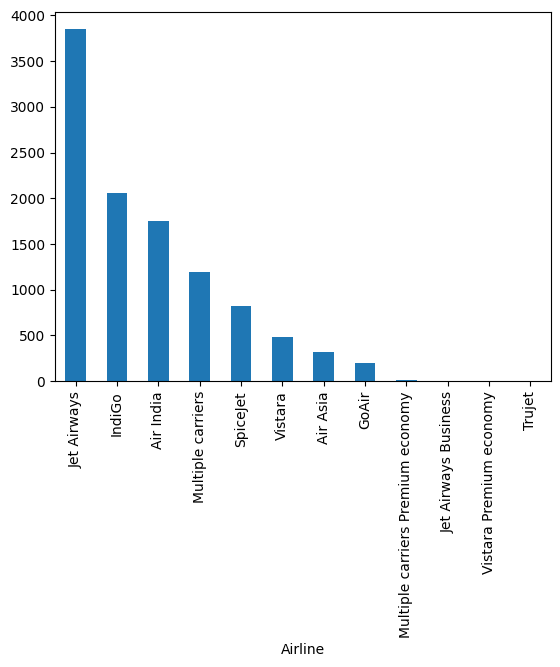

In [23]:
df['Airline'].value_counts().plot(kind = 'bar')

In [24]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [25]:
df['Airline'].nunique()

12

In [26]:
len(df[df['Airline'] == 'Vistara'])

479

In [27]:
for i in df['Airline'].unique():
  print(i,len(df[df['Airline'] == i]))

IndiGo 2053
Air India 1751
Jet Airways 3849
SpiceJet 818
Multiple carriers 1196
GoAir 194
Vistara 479
Air Asia 319
Vistara Premium economy 3
Jet Airways Business 6
Multiple carriers Premium economy 13
Trujet 1


In [28]:
df[df['Airline'] == 'Multiple carriers Premium economy']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
717,Multiple carriers Premium economy,21/03/2019,Delhi,Cochin,DEL → BOM → COK,07:30,19:15,11h 45m,1 stop,No info,10161
1799,Multiple carriers Premium economy,21/03/2019,Delhi,Cochin,DEL → BOM → COK,07:30,21:00,13h 30m,1 stop,No info,9845
4627,Multiple carriers Premium economy,21/03/2019,Delhi,Cochin,DEL → BOM → COK,08:55,19:15,10h 20m,1 stop,No info,10161
4718,Multiple carriers Premium economy,21/03/2019,Delhi,Cochin,DEL → BOM → COK,06:00,21:00,15h,1 stop,No info,9845
5090,Multiple carriers Premium economy,21/03/2019,Delhi,Cochin,DEL → BOM → COK,06:00,13:20,7h 20m,1 stop,No info,11269
5489,Multiple carriers Premium economy,21/03/2019,Delhi,Cochin,DEL → BOM → COK,06:00,15:30,9h 30m,1 stop,No info,11269
5673,Multiple carriers Premium economy,21/03/2019,Delhi,Cochin,DEL → BOM → COK,06:00,18:50,12h 50m,1 stop,No info,14629
5836,Multiple carriers Premium economy,21/03/2019,Delhi,Cochin,DEL → BOM → COK,07:30,18:50,11h 20m,1 stop,No info,14629
6470,Multiple carriers Premium economy,21/03/2019,Delhi,Cochin,DEL → BOM → COK,08:55,21:00,12h 5m,1 stop,No info,9845
6591,Multiple carriers Premium economy,21/03/2019,Delhi,Cochin,DEL → BOM → COK,08:55,15:30,6h 35m,1 stop,No info,11269


# 2.2) Date of journey cleaning and exploration

In [29]:
df['Date_of_Journey'].value_counts()

,count
Date_of_Journey,
18/05/2019,504
6/06/2019,503
21/05/2019,497
9/06/2019,495
12/06/2019,493
9/05/2019,484
21/03/2019,423
15/05/2019,405
27/05/2019,382


In [30]:
df['Date_of_Journey'].unique()

array(['24/03/2019', '1/05/2019', '9/06/2019', '12/05/2019', '01/03/2019',
       '24/06/2019', '12/03/2019', '27/05/2019', '1/06/2019',
       '18/04/2019', '9/05/2019', '24/04/2019', '3/03/2019', '15/04/2019',
       '12/06/2019', '6/03/2019', '21/03/2019', '3/04/2019', '6/05/2019',
       '15/05/2019', '18/06/2019', '15/06/2019', '6/04/2019',
       '18/05/2019', '27/06/2019', '21/05/2019', '06/03/2019',
       '3/06/2019', '15/03/2019', '3/05/2019', '9/03/2019', '6/06/2019',
       '24/05/2019', '09/03/2019', '1/04/2019', '21/04/2019',
       '21/06/2019', '27/03/2019', '18/03/2019', '12/04/2019',
       '9/04/2019', '1/03/2019', '03/03/2019', '27/04/2019'], dtype=object)

In [31]:
df['Date_of_Journey'].nunique()

44

In [32]:
df['Date_of_Journey'][0].split('/')

['24', '03', '2019']

In [33]:
month = []

for i in df['Date_of_Journey']:
  month.append(i.split('/')[1])

In [34]:
df['Months'] = month

In [35]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Months
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,03
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,05
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,06
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,05
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,03


In [36]:
year = []

for i in df['Date_of_Journey']:
  year.append(i.split('/')[2])

In [37]:
df['Years'] = year

In [38]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Months,Years
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,03,2019


In [39]:
day = []

for i in df['Date_of_Journey']:
  day.append(i.split('/')[0])

In [40]:
df['Days'] = day

In [41]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Months,Years,Days
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,03,2019,24
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,05,2019,1
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,06,2019,9
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,05,2019,12
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,03,2019,01


In [42]:
del df['Months']

In [43]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Years,Days
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019,24
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,2019,1
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,2019,9
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,2019,12
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,2019,01


In [44]:
df['Day'] = df['Date_of_Journey'].str.split('/').str[0].astype(int)
df['Month'] = df['Date_of_Journey'].str.split('/').str[1].astype(int)
df['Year'] = df['Date_of_Journey'].str.split('/').str[2].astype(int)

In [45]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Years,Days,Day,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019,24,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,2019,1,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,2019,9,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,2019,12,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,2019,01,1,3,2019


In [46]:
del df['Date_of_Journey']

In [47]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Years,Days,Day,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019,24,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,2019,1,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,2019,9,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,2019,12,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,2019,01,1,3,2019


# 2.3) Checking source and destination

In [48]:
df['Source'].value_counts()

,count
Source,
Delhi,4536
Kolkata,2871
Banglore,2197
Mumbai,697
Chennai,381


In [49]:
df['Destination'] = df['Destination'].str.replace('New Delhi','Delhi')

In [50]:
df['Destination'].value_counts()

,count
Destination,
Cochin,4536
Banglore,2871
Delhi,2197
Hyderabad,697
Kolkata,381


In [51]:
del df['Route']

In [52]:
df.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Years,Days,Day,Month,Year
0,IndiGo,Banglore,Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019,24,24,3,2019
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662,2019,1,1,5,2019
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,No info,13882,2019,9,9,6,2019
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,No info,6218,2019,12,12,5,2019
4,IndiGo,Banglore,Delhi,16:50,21:35,4h 45m,1 stop,No info,13302,2019,01,1,3,2019


In [53]:
df['Dep_HRS'] = df['Dep_Time'].str.split(':').str[0].astype(int)
df['Dep_MIN'] = df['Dep_Time'].str.split(':').str[1].astype(int)

In [54]:
del df['Dep_Time']

In [55]:
df.head()

,Airline,Source,Destination,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Years,Days,Day,Month,Year,Dep_HRS,Dep_MIN
0,IndiGo,Banglore,Delhi,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019,24,24,3,2019,22,20
1,Air India,Kolkata,Banglore,13:15,7h 25m,2 stops,No info,7662,2019,1,1,5,2019,5,50
2,Jet Airways,Delhi,Cochin,04:25 10 Jun,19h,2 stops,No info,13882,2019,9,9,6,2019,9,25
3,IndiGo,Kolkata,Banglore,23:30,5h 25m,1 stop,No info,6218,2019,12,12,5,2019,18,5
4,IndiGo,Banglore,Delhi,21:35,4h 45m,1 stop,No info,13302,2019,01,1,3,2019,16,50


In [56]:
df['Arrival_Time'].str.split(' ').str[0].str.split(':')

,Arrival_Time
0,"[01, 10]"
1,"[13, 15]"
2,"[04, 25]"
3,"[23, 30]"
4,"[21, 35]"
...,...
10678,"[22, 25]"
10679,"[23, 20]"
10680,"[11, 20]"
10681,"[14, 10]"


In [57]:
df['Arrival_HRS'] = df['Arrival_Time'].str.split(' ').str[0].str.split(':').str[0].astype(int)
df['Arrival_MIN'] = df['Arrival_Time'].str.split(' ').str[0].str.split(':').str[1].astype(int)


In [58]:
del df['Arrival_Time']


In [59]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Years,Days,Day,Month,Year,Dep_HRS,Dep_MIN,Arrival_HRS,Arrival_MIN
0,IndiGo,Banglore,Delhi,2h 50m,non-stop,No info,3897,2019,24,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662,2019,1,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,19h,2 stops,No info,13882,2019,9,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,No info,6218,2019,12,12,5,2019,18,5,23,30
4,IndiGo,Banglore,Delhi,4h 45m,1 stop,No info,13302,2019,01,1,3,2019,16,50,21,35


In [60]:
df = df[df['Duration'] != '5m']

In [61]:
df['HRS'] = df['Duration'].str.split(' ').str[0].str.split('h').str[0].astype(int)*60

In [62]:
df['MIN'] = df['Duration'].str.split(' ').str[1].str.split('m').str[0].fillna(0).astype(int)

In [63]:
df['Duration_in_mins'] = df['HRS']+df['MIN']

In [64]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Years,Days,Day,Month,Year,Dep_HRS,Dep_MIN,Arrival_HRS,Arrival_MIN,HRS,MIN,Duration_in_mins
0,IndiGo,Banglore,Delhi,2h 50m,non-stop,No info,3897,2019,24,24,3,2019,22,20,1,10,120,50,170
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662,2019,1,1,5,2019,5,50,13,15,420,25,445
2,Jet Airways,Delhi,Cochin,19h,2 stops,No info,13882,2019,9,9,6,2019,9,25,4,25,1140,0,1140
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,No info,6218,2019,12,12,5,2019,18,5,23,30,300,25,325
4,IndiGo,Banglore,Delhi,4h 45m,1 stop,No info,13302,2019,01,1,3,2019,16,50,21,35,240,45,285


In [65]:
del df['HRS']
del df['MIN']

In [66]:
del df['Duration']

In [67]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Years,Days,Day,Month,Year,Dep_HRS,Dep_MIN,Arrival_HRS,Arrival_MIN,Duration_in_mins
0,IndiGo,Banglore,Delhi,non-stop,No info,3897,2019,24,24,3,2019,22,20,1,10,170
1,Air India,Kolkata,Banglore,2 stops,No info,7662,2019,1,1,5,2019,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,2019,9,9,6,2019,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,2019,12,12,5,2019,18,5,23,30,325
4,IndiGo,Banglore,Delhi,1 stop,No info,13302,2019,01,1,3,2019,16,50,21,35,285


In [68]:
df['Additional_Info'].value_counts()

,count
Additional_Info,
No info,8343
In-flight meal not included,1982
No check-in baggage included,320
1 Long layover,19
Change airports,7
Business class,4
No Info,3
1 Short layover,1
Red-eye flight,1


In [69]:
del df['Additional_Info']

In [70]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Years,Days,Day,Month,Year,Dep_HRS,Dep_MIN,Arrival_HRS,Arrival_MIN,Duration_in_mins
0,IndiGo,Banglore,Delhi,non-stop,3897,2019,24,24,3,2019,22,20,1,10,170
1,Air India,Kolkata,Banglore,2 stops,7662,2019,1,1,5,2019,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,2 stops,13882,2019,9,9,6,2019,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,1 stop,6218,2019,12,12,5,2019,18,5,23,30,325
4,IndiGo,Banglore,Delhi,1 stop,13302,2019,01,1,3,2019,16,50,21,35,285


In [71]:
df.describe()

,Price,Day,Month,Year,Dep_HRS,Dep_MIN,Arrival_HRS,Arrival_MIN,Duration_in_mins
count,10681.000000,10681.000000,10681.000000,10681.0,10681.000000,10681.000000,10681.000000,10681.000000,10681.000000
mean,9086.443123,13.509784,4.708735,2019.0,12.490684,24.406891,13.348937,24.687763,643.080236
std,4611.075357,8.479449,1.164345,0.0,5.748989,18.767046,6.859590,16.504975,507.816377
min,1759.000000,1.000000,3.000000,2019.0,0.000000,0.000000,0.000000,0.000000,75.000000
25%,5277.000000,6.000000,3.000000,2019.0,8.000000,5.000000,8.000000,10.000000,170.000000
50%,8372.000000,12.000000,5.000000,2019.0,11.000000,25.000000,14.000000,25.000000,520.000000
75%,12373.000000,21.000000,6.000000,2019.0,18.000000,40.000000,19.000000,35.000000,930.000000
max,79512.000000,27.000000,6.000000,2019.0,23.000000,55.000000,23.000000,55.000000,2860.000000


<Axes: xlabel='Duration_in_mins', ylabel='Count'>

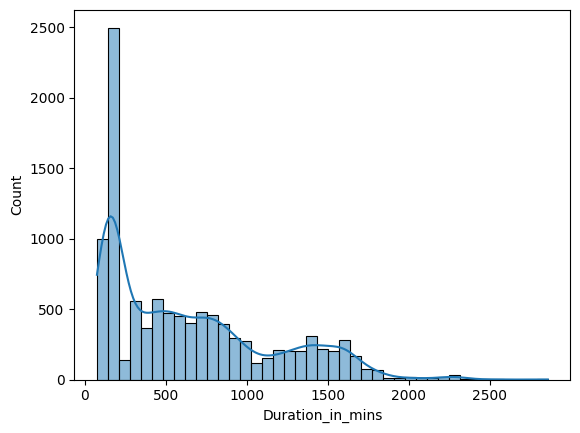

In [72]:
import seaborn as sns
sns.histplot (data = df['Duration_in_mins'], kde=True)

# 3) DATA ANALYSIS

In [73]:
'''
KPI's

1) Average Ticket Price by Airline
2) Average Ticket Price by Route (Source → Destination)
3) Average Price by Number of Stops
4) Flight Volume by Airline
5) Flight Volume by Source Airport
6) Monthly Price Trend
7) Average Departure Hour by Airline
8) Average Duration Per Airline
'''

"\nKPI's\n\n1) Average Ticket Price by Airline\n2) Average Ticket Price by Route (Source → Destination)\n3) Average Price by Number of Stops\n4) Flight Volume by Airline\n5) Flight Volume by Source Airport\n6) Monthly Price Trend\n7) Average Departure Hour by Airline\n8) Average Duration Per Airline\n"

<Axes: xlabel='Airline'>

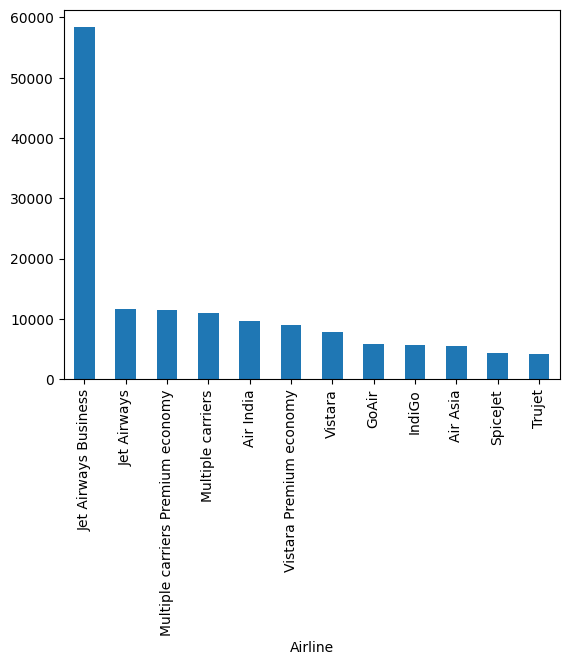

In [74]:
#3.1) Average Ticket Price by Airline

df.groupby('Airline')['Price'].mean().sort_values(ascending=False).plot(kind='bar')

In [75]:
#3.2) Average Ticket Price by Route (Source → Destination)


df.groupby(['Source','Destination'])['Price'].mean().sort_values(ascending=False)

,,Price
Source,Destination,
Delhi,Cochin,10540.113536
Kolkata,Banglore,9158.389411
Banglore,Delhi,8017.464269
Mumbai,Hyderabad,5042.083333
Chennai,Kolkata,4789.892388


<Axes: xlabel='Total_Stops'>

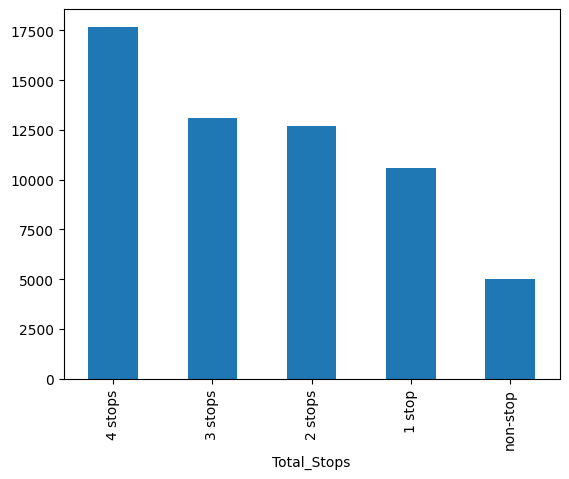

In [78]:
# 3.3) Average Price by Number of Stops

df.groupby("Total_Stops")["Price"].mean().sort_values(ascending=False).plot(kind='bar')

In [79]:
# 3.4) Flight Volume by Airline

df["Airline"].value_counts()

,count
Airline,
Jet Airways,3849
IndiGo,2053
Air India,1750
Multiple carriers,1196
SpiceJet,818
Vistara,479
Air Asia,319
GoAir,194
Multiple carriers Premium economy,13


In [80]:
# 3.5) Flight Volume by Source Airport
# value_counts()..... tells us how many times each value appears

df["Source"].value_counts()

,count
Source,
Delhi,4536
Kolkata,2871
Banglore,2197
Mumbai,696
Chennai,381


In [82]:
# 3.6) Monthly Price Trend

df.groupby("Month")["Price"].mean()

,Price
Month,
3,10670.762027
4,5770.847081
5,9127.722944
6,8828.796134


In [83]:
# 3.7) Average Departure Hour by Airline

df.groupby("Airline")["Dep_HRS"].mean()

,Dep_HRS
Airline,
Air Asia,13.996865
Air India,12.321714
GoAir,11.798969
IndiGo,12.215295
Jet Airways,13.363731
Jet Airways Business,10.666667
Multiple carriers,10.062709
Multiple carriers Premium economy,7.769231
SpiceJet,12.282396


In [87]:
# 3.8) Average Duration Per Airline

df.groupby("Airline")["Duration_in_mins"].count()

,Duration_in_mins
Airline,
Air Asia,319
Air India,1750
GoAir,194
IndiGo,2053
Jet Airways,3849
Jet Airways Business,6
Multiple carriers,1196
Multiple carriers Premium economy,13
SpiceJet,818
